


# Web Scraping for Useful Solar Flare Data


In [1]:
#importing requisite libraries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from io import StringIO
import matplotlib as plt
import datetime

**Task 1: Scraping Space Weather Live**

requests.get() was not working in Jupyter notebook and kept throwing 403 error. Therefore, I had to use google collab in chrome and update the 'user-agent' header. I learned this by inputing the header found by initiating the following search:

[link text](https://www.google.com/search?q=get+user+agent&rlz=1C1CHBF_enUS942US942&oq=get+user+agent&gs_lcrp=EgZjaHJvbWUyBggAEEUYOdIBCTEwODU1ajBqN6gCALACAA&sourceid=chrome&ie=UTF-8 [link text](https://))

In [2]:
# using requests to scrape website and check whether request went through
url1="https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html"
req=requests.Session()
text=req.get(url1,headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'})
print(text)


<Response [200]>


In [ ]:
#converting scraping to BeautifulSoup and using prettify to find table location
stuff=BeautifulSoup(text.text,'html.parser')
print(stuff.prettify())



In [6]:
#using the div type to find table, read the table into Pandas, convert it into a dataframe, and rename the columns
tdata=stuff.find("table")
data=pd.read_html(str(tdata))
data=data[0]
data=data.rename(columns={'Unnamed: 0':'Rank','Unnamed: 1':'x_classification','Unnamed: 2':'date','Start':'start_time','Maximum':'maximum_time','End':'end_time','Unnamed: 7':'movie'})
data.head()


,Rank,x_classification,date,Region,start_time,maximum_time,end_time,movie
0,1,X40+,2003/11/04,486,19:29,19:53,20:06,View archive
1,2,X28.57+,2001/04/02,9393,21:32,21:51,22:03,View archive
2,3,X24.57+,2003/10/28,486,09:51,11:10,11:24,View archive
3,4,X24.42+,2005/09/07,808,17:17,17:40,18:03,View archive
4,5,X20.67+,2001/04/15,9415,13:19,13:50,13:55,View archive


# **Task 2: Cleaning Space Weather Live Data**

In [7]:
#dropping the movie column
data=data.drop(['movie'],axis=1)


In [8]:
#combining date with start,end,and max time into datetime columns and dropping the redundant columns
data['start_datetime']=pd.to_datetime(data['date'] + ' ' + data['start_time'])
data['maximum_datetime']=pd.to_datetime(data['date'] + ' ' + data['maximum_time'])
data['end_datetime']=pd.to_datetime(data['date'] + ' ' + data['end_time'])
data=data.drop(['date'],axis=1)
data=data.drop(['start_time'],axis=1)
data=data.drop(['maximum_time'],axis=1)
data=data.drop(['end_time'],axis=1)



In [9]:
#replacing any missing values for region
data['Region'].replace('-','NaN',inplace=True)
data.head()

,Rank,x_classification,Region,start_datetime,maximum_datetime,end_datetime
0,1,X40+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X28.57+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X24.57+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X24.42+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X20.67+,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


**Task 3: Scraping NASA table**

In [10]:
#scraping data and checking request went through
url2='https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'
text2=req.get(url2,headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'})
print(text2)

<Response [200]>


In [ ]:
#creating beautifulsoup object and prettify printing to find table location (not shown to make notebook pdf shorter)
stuff2=BeautifulSoup(text2.text,'html.parser')
print(stuff2.prettify())


In [ ]:
#no table object, but table is nested in section called 'pre' (not shown to make notebook pdf shorter)
information=stuff2.find('pre')
information=information.text
print(information)


In [14]:
#first string of table is "1996", so this allows me to find location in string where table begins
print(information.index("1996"))

828


In [ ]:
#removing all text from before beginning of table
information=information[828:]


In [16]:
#table border begins with "=" so finding the index of it
print(information.index("="))

59910


In [ ]:
#removing text that comes after table

information=information[0:59910]


In [18]:
#making string parseable by pandas and creating dataframe using line-breaks as delimiter
stringdata=StringIO(information)
table2=pd.read_table(stringdata,header=None)
print(table2)

                                                     0
0    1996/05/15 05:45 05/15 06:34 10000   500   ---...
1    1997/01/20 08:56 01/20 09:02 14000 12000   ---...
2    1997/04/01 14:00 04/01 14:15  8000  4000   S25...
3    1997/04/07 14:30 04/07 17:30 11000  1000   S28...
4    1997/05/12 05:15 05/14 16:00 12000    80   N21...
..                                                 ...
600  2023/05/05 08:04 05/05 08:50 14000  1300   N14...
601  2023/05/07 22:57 05/08 00:10 14000   600   N16...
602  2023/05/09 18:51 05/09 20:20 16000  1250   N13...
603  2023/06/17 10:37 06/17 10:42 14000  5500   S22...
604  2023/06/20 17:54 06/10 18:30 14000  2000   S17...

[605 rows x 1 columns]


In [19]:
#splitting row strings into columns using the space delimiter
table2=table2[0].str.split(expand=True)
print(table2)

             0      1      2      3      4      5       6      7     8   \
0    1996/05/15  05:45  05/15  06:34  10000    500  ------  -----  ----   
1    1997/01/20  08:56  01/20  09:02  14000  12000  ------  -----  ----   
2    1997/04/01  14:00  04/01  14:15   8000   4000  S25E16   8026  M1.3   
3    1997/04/07  14:30  04/07  17:30  11000   1000  S28E19   8027  C6.8   
4    1997/05/12  05:15  05/14  16:00  12000     80  N21W08   8038  C1.3   
..          ...    ...    ...    ...    ...    ...     ...    ...   ...   
600  2023/05/05  08:04  05/05  08:50  14000   1300  N14E32  13296  M2.1   
601  2023/05/07  22:57  05/08  00:10  14000    600  N16W06  13296  M1.6   
602  2023/05/09  18:51  05/09  20:20  16000   1250  N13W31  13296  M4.2   
603  2023/06/17  10:37  06/17  10:42  14000   5500  S22E85     EP  ----   
604  2023/06/20  17:54  06/10  18:30  14000   2000  S17E73  13341  X1.1   

        9   ...    14         15    16    17    18    19    20    21    22  \
0    --/--  ...  PHTX

In [20]:
#creating data-frame that removes extraneous columns and labels columns
data2=table2.iloc[:,0:15]
data2.rename(columns={0 :'start_date',1 :'start_time',2 :'end_date',3:'end_time',4:'start_frequency',5:'end_frequency',6:'flare_location',7:'flare_region',8:'flare_classification',9:'cme_date',10:'cme_time',11:'cme_angle',12:'cme_width',13:'cme_speed',14:'Plot'},inplace=True)
data2.head()

<ipython-input-20-9ef36ccab8a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.rename(columns={0 :'start_date',1 :'start_time',2 :'end_date',3:'end_time',4:'start_frequency',5:'end_frequency',6:'flare_location',7:'flare_region',8:'flare_classification',9:'cme_date',10:'cme_time',11:'cme_angle',12:'cme_width',13:'cme_speed',14:'Plot'},inplace=True)


,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,Plot
0,1996/05/15,05:45,05/15,06:34,10000,500,------,-----,----,--/--,--:--,----,----,----,PHTX
1,1997/01/20,08:56,01/20,09:02,14000,12000,------,-----,----,01/20,09:31,281,72,175,PHTX
2,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
3,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
4,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX


**Task 4: Cleaning NASA Table**

In [21]:
# Replacing codes for missing values based on data description AND reading of table
data2['start_frequency'].replace("????",'NaN',inplace=True)
data2['end_frequency'].replace("????",'NaN',inplace=True)
data2['flare_location'].replace("------",'NaN',inplace=True)
data2['flare_region'].replace({"-----":'NaN',"DIM":'NaN',"EP":'NaN'},inplace=True)
data2['flare_classification'].replace("----",'NaN',inplace=True)
data2['cme_date'].replace("--/--",'NaN',inplace=True)
data2['cme_time'].replace("--:--",'NaN',inplace=True)
data2['cme_angle'].replace("----",'NaN',inplace=True)
data2['cme_width'].replace("----",'NaN',inplace=True)
data2['cme_speed'].replace("----",'NaN',inplace=True)
data2['flare_classification'].replace("----",'NaN',inplace=True)
print(data2.head())

   start_date start_time end_date end_time start_frequency end_frequency  \
0  1996/05/15      05:45    05/15    06:34           10000           500   
1  1997/01/20      08:56    01/20    09:02           14000         12000   
2  1997/04/01      14:00    04/01    14:15            8000          4000   
3  1997/04/07      14:30    04/07    17:30           11000          1000   
4  1997/05/12      05:15    05/14    16:00           12000            80   

  flare_location flare_region flare_classification cme_date cme_time  \
0            NaN          NaN                  NaN      NaN      NaN   
1            NaN          NaN                  NaN    01/20    09:31   
2         S25E16         8026                 M1.3    04/01    15:18   
3         S28E19         8027                 C6.8    04/07    14:27   
4         N21W08         8038                 C1.3    05/12    05:30   

  cme_angle cme_width cme_speed  Plot  
0       NaN       NaN       NaN  PHTX  
1       281        72       17

<ipython-input-21-34eadc6ed203>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['start_frequency'].replace("????",'NaN',inplace=True)
<ipython-input-21-34eadc6ed203>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['end_frequency'].replace("????",'NaN',inplace=True)
<ipython-input-21-34eadc6ed203>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['flare_location'].replace("------",'NaN',inplace=True)
<ipython-input-21

In [22]:
# creating Boolean columns for whether or not cme angle is "halo"and whether the cme width is a lower bound result
data2['is_halo']=data2['cme_angle']=='Halo'
data2['width_lower_bound']=data2['cme_width'].str.contains('>')
data2.head()

<ipython-input-22-4f3780799ee9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['is_halo']=data2['cme_angle']=='Halo'
<ipython-input-22-4f3780799ee9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['width_lower_bound']=data2['cme_width'].str.contains('>')


,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,Plot,is_halo,width_lower_bound
0,1996/05/15,05:45,05/15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHTX,False,False
1,1997/01/20,08:56,01/20,09:02,14000,12000,NaN,NaN,NaN,01/20,09:31,281,72,175,PHTX,False,False
2,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,False,False
3,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX,True,False
4,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX,True,False


In [23]:
# Replacing 'Halo' in CME angle with 'NaN' and removing '>" from CME width
data2['cme_angle'].replace('Halo','NaN',inplace=True)
data2['cme_width']=data2['cme_width'].str.lstrip('>')
print(data2)

     start_date start_time end_date end_time start_frequency end_frequency  \
0    1996/05/15      05:45    05/15    06:34           10000           500   
1    1997/01/20      08:56    01/20    09:02           14000         12000   
2    1997/04/01      14:00    04/01    14:15            8000          4000   
3    1997/04/07      14:30    04/07    17:30           11000          1000   
4    1997/05/12      05:15    05/14    16:00           12000            80   
..          ...        ...      ...      ...             ...           ...   
600  2023/05/05      08:04    05/05    08:50           14000          1300   
601  2023/05/07      22:57    05/08    00:10           14000           600   
602  2023/05/09      18:51    05/09    20:20           16000          1250   
603  2023/06/17      10:37    06/17    10:42           14000          5500   
604  2023/06/20      17:54    06/10    18:30           14000          2000   

    flare_location flare_region flare_classification cme_date c

<ipython-input-23-3cd05324d2c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['cme_angle'].replace('Halo','NaN',inplace=True)
<ipython-input-23-3cd05324d2c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['cme_width']=data2['cme_width'].str.lstrip('>')


In [24]:
#creating start_datetime column
data2['start_date']=pd.to_datetime(data2['start_date']+' '+data2['start_time'])
data2=data2.drop(['start_time'],axis=1)


<ipython-input-24-665a3da1c63f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['start_date']=pd.to_datetime(data2['start_date']+' '+data2['start_time'])


In [25]:
#other date columns don't have year, so need to grab year from start_datetime
year=data2['start_date'].dt.year.astype(str)
month_day=data2['cme_date']
month_day2=data2['end_date']

#add it to the date columns
data2['cme_date']=(year+'/'+month_day)
data2['end_date']=(year+'/'+month_day2)

#creating datetime and forcing error when date or time contains 'NaN'
data2['cme_date']=pd.to_datetime(data2['cme_date']+' '+data2['cme_time'],errors='coerce')
data2['end_date']=pd.to_datetime(data2['end_date']+' '+data2['end_time'],errors='coerce')
data2.rename(columns={'start_date':'start_datetime','end_date':'end_datetime','cme_date':'cme_datetime'},inplace=True)
#dropping redundant columns
data2=data2.drop('end_time',axis=1)
data2=data2.drop('cme_time',axis=1)

data2.head()

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,Plot,is_halo,width_lower_bound
0,1996-05-15 05:45:00,1996-05-15 06:34:00,10000,500,NaN,NaN,NaN,NaT,NaN,NaN,NaN,PHTX,False,False
1,1997-01-20 08:56:00,1997-01-20 09:02:00,14000,12000,NaN,NaN,NaN,1997-01-20 09:31:00,281,72,175,PHTX,False,False
2,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
3,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False
4,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False


**Task 5:Duplicating Spaceweather live data from NASA table**

In attempting to sort the NASA table by flare classification, the main challenge is that the classification reads as a string, but it is classified by a combination of strings and numbers. Therefore, by sorting flare classification reverse-alphabetically "X9" flares would rank higher than "X20" flares even though in reality it is the other way around. Therefore, to sort by classification, I created separate columns for the letter and numbers and sorted first on letter, then on number.

In [32]:
#making copy eliminating rows where 'flare_classification' is 'NaN'
data2_copy=data2.loc[data2['flare_classification']!= 'NaN']
#making separate columns for classification letter and numbers
data2_copy['Flare_Letter']=data2_copy['flare_classification'].str[0]
data2_copy['Flare_Number']=data2_copy['flare_classification'].str[1:]
data2_copy['Flare_Number']=pd.to_numeric(data2_copy['Flare_Number'])

#sorting, making it into a top-50, and rearranging the columns to reproduce SWL
flare_sorted=data2_copy.sort_values(by=['Flare_Letter','Flare_Number'],ascending=False)
flare_sorted50=flare_sorted.iloc[0:49,:]
space_weather_live_duplicate=flare_sorted50.iloc[:,[6,5,0,7,1]]
print(space_weather_live_duplicate)

    flare_classification flare_region      start_datetime        cme_datetime  \
251                 X28.        10486 2003-11-04 20:00:00 2003-11-04 19:54:00   
129                 X20.         9393 2001-04-02 22:05:00 2001-04-02 22:06:00   
244                 X17.        10486 2003-10-28 11:10:00 2003-10-28 11:30:00   
138                 X14.         9415 2001-04-15 14:05:00 2001-04-15 14:06:00   
245                 X10.        10486 2003-10-29 20:55:00 2003-10-29 20:54:00   
10                  X9.4         8100 1997-11-06 12:20:00 1997-11-06 12:10:00   
525                 X9.3        12673 2017-09-06 12:05:00 2017-09-06 12:24:00   
339                 X9.0        10930 2006-12-05 10:50:00                 NaT   
248                 X8.3        10486 2003-11-02 17:30:00 2003-11-02 17:30:00   
526                 X8.2        12673 2017-09-10 16:02:00 2017-09-10 16:00:00   
299                 X7.1        10720 2005-01-20 07:15:00 2005-01-20 06:54:00   
370                 X6.9    

<ipython-input-32-bf295c70db03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_copy['Flare_Letter']=data2_copy['flare_classification'].str[0]
<ipython-input-32-bf295c70db03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_copy['Flare_Number']=data2_copy['flare_classification'].str[1:]
<ipython-input-32-bf295c70db03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

I could only somewhat replicate the SWL table when sorting by flare classification. Aside from the difficulty of sorting by class then by number, the NASA table has different classifcations than the SWL table. Therefore, some flares appear in a different order than on the SWL table (some from SWL don't even appear). Additionally, where the rankings do line-up, the NASA table codes regions differently (however, the last 4 numbers match on both tables match) and the tables often differ in the time elements when measured. Therefore, one cannot recreate the SWL table simply by ranking the classifications in the NASA table.

**Task6**

As mentioned in task 5, flare classification would not be a good way to match flares from the NASA table to the top 50 because the classifications do not match from table to table (and the ranking does not necessarily hold up). Therefore, I opted instead to define a matching entry as when both the region and start_date match in both tables (in most cases the times did not match and/or were missing in the NASA table hence why I could only use date alone).

In [33]:
#in the top 50 data, regions starting with zero were only coded as 3 digits. I adding the zero back to match the last 4 digits of NASA data
data['Region']='0'+data['Region'].astype(str)

In [34]:
#creating an empty column to store rank from the top 50 table
data2['Rank']=''


In [35]:
#checking every entry in the NASA table for a corresponding entry in SWL table using the last 4 digits of region and the start date, and capturing the ranking when applicable
for i in data2.index:
  for j in data.index:
    if data2['flare_region'][i][-4:]==data['Region'][j][-4:] and data2['start_datetime'][i].strftime("%Y%m%d") == (data['start_datetime'][j]).strftime("%Y%m%d"):
      data2['Rank'][i]=data['Rank'][j]
      break


data2['Rank'].replace('','NaN',inplace=True)
data2.head()

<ipython-input-35-6cb59986eb04>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Rank'][i]=data['Rank'][j]


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,Plot,is_halo,width_lower_bound,Rank
0,1996-05-15 05:45:00,1996-05-15 06:34:00,10000,500,NaN,NaN,NaN,NaT,NaN,NaN,NaN,PHTX,False,False,NaN
1,1997-01-20 08:56:00,1997-01-20 09:02:00,14000,12000,NaN,NaN,NaN,1997-01-20 09:31:00,281,72,175,PHTX,False,False,NaN
2,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False,NaN
3,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False,NaN
4,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False,NaN


In [36]:
#checking a ranked flare to make sure that the above loop worked
data2.iloc[[525]]

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,Plot,is_halo,width_lower_bound,Rank
525,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False,7


**Task 7: Exploratory Graphs**

In [37]:
#creating a boolean column as to whether a flare is ranked or not as its actual ranking is not important for the subsequent analyses
data2['Ranked']=data2['Rank']!='NaN'
data2.head()

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,Plot,is_halo,width_lower_bound,Rank,Ranked
0,1996-05-15 05:45:00,1996-05-15 06:34:00,10000,500,NaN,NaN,NaN,NaT,NaN,NaN,NaN,PHTX,False,False,NaN,False
1,1997-01-20 08:56:00,1997-01-20 09:02:00,14000,12000,NaN,NaN,NaN,1997-01-20 09:31:00,281,72,175,PHTX,False,False,NaN,False
2,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False,NaN,False
3,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False,NaN,False
4,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False,NaN,False


<Axes: title={'center': 'Flare Starting Frequency over Time (Red dots indicate a top50 flare)'}, xlabel='start_datetime', ylabel='start_frequency(kHz)'>

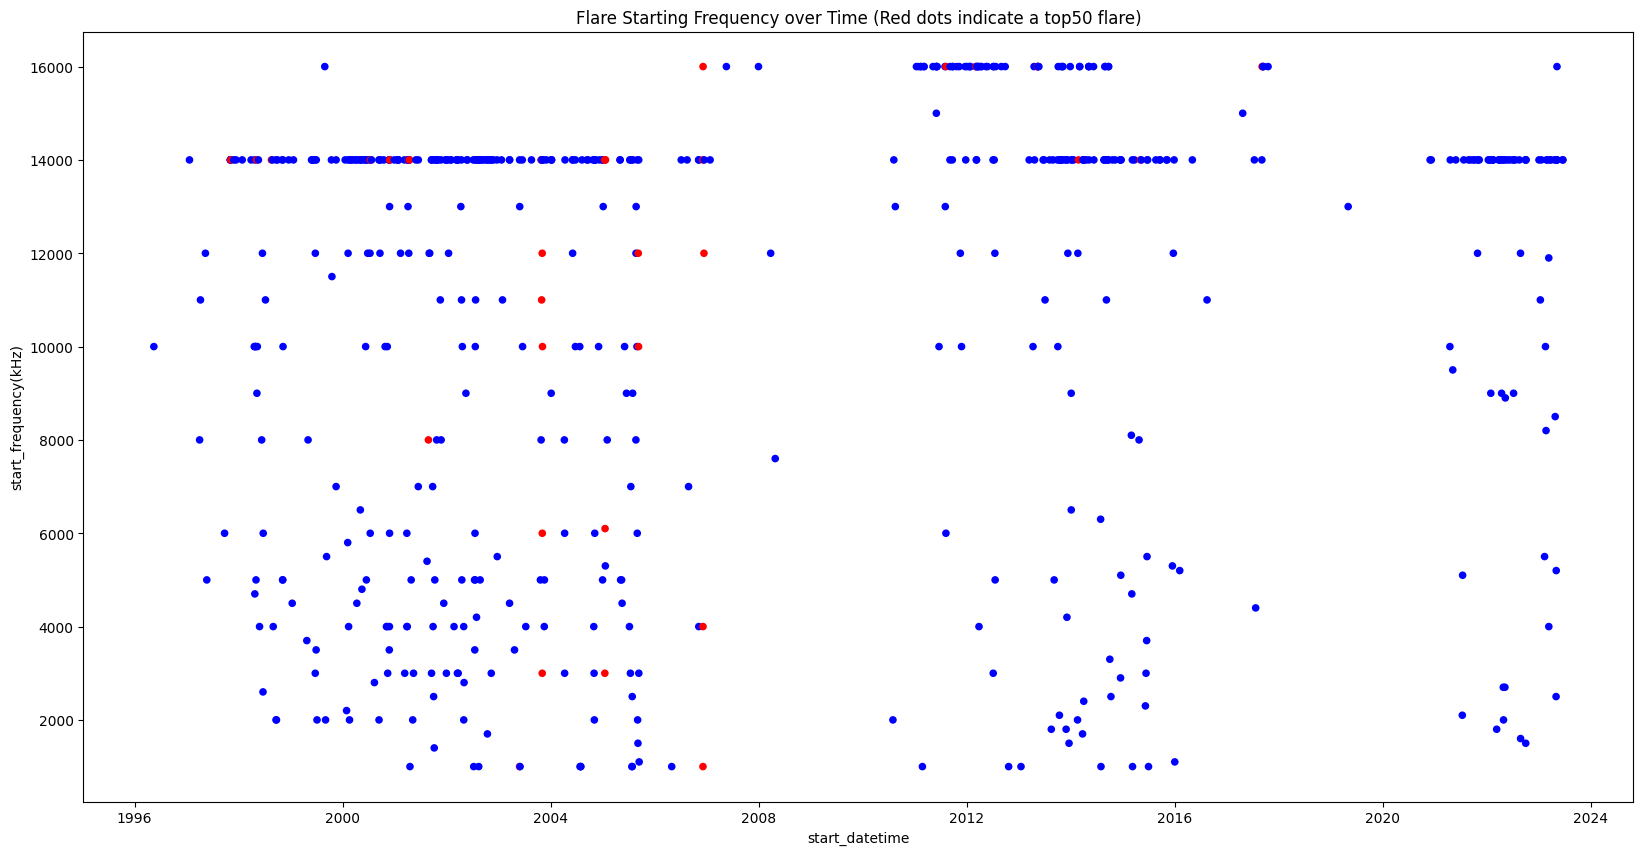

In [40]:
#plotting starting frequency of solar flares over time coded for ranking
colors=np.where(data2['Ranked']==True,'red','blue')
data2['start_frequency']=pd.to_numeric(data2['start_frequency'],errors='coerce')
data2.plot.scatter(x='start_datetime', y='start_frequency',c=colors,figsize=(20,10),title='Flare Starting Frequency over Time (Red dots indicate a top50 flare)' ,ylabel='start_frequency(kHz)')


Top 50 flares tended to have starting frequencies over 10000 khz.

<Axes: title={'center': 'Flare Ending Frequency over Time (Red dots indicate a top50 flare)'}, xlabel='start_datetime', ylabel='end_frequency(kHz)'>

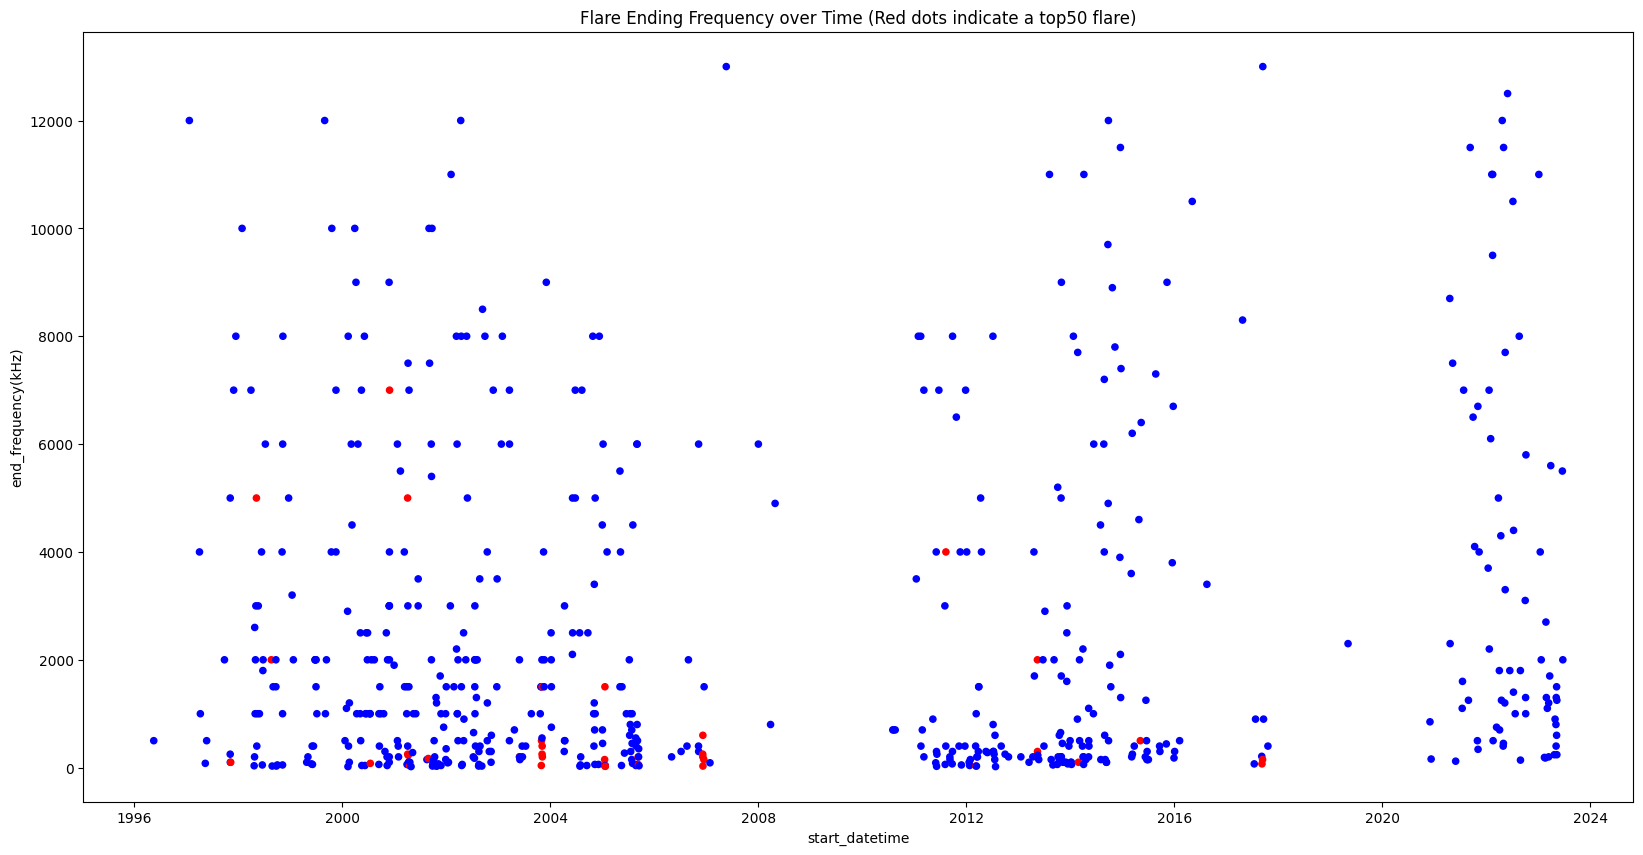

In [39]:
# plotting end frequency over time  coding for ranking
colors=np.where(data2['Ranked']==True,'red','blue')
data2['end_frequency']=pd.to_numeric(data2['end_frequency'],errors='coerce')
data2.plot.scatter(x='start_datetime', y='end_frequency',c=colors,figsize=(20,10),title='Flare Ending Frequency over Time (Red dots indicate a top50 flare)',ylabel="end_frequency(kHz)")


Top 50 flares tended to have lower end_frequencies (most were 2000 kHz or below).

<Axes: title={'center': 'Flare Solar Wind Speed over Time (Red dots indicate a top50 flare)'}, xlabel='start_datetime', ylabel='cme_speed(km/s)'>

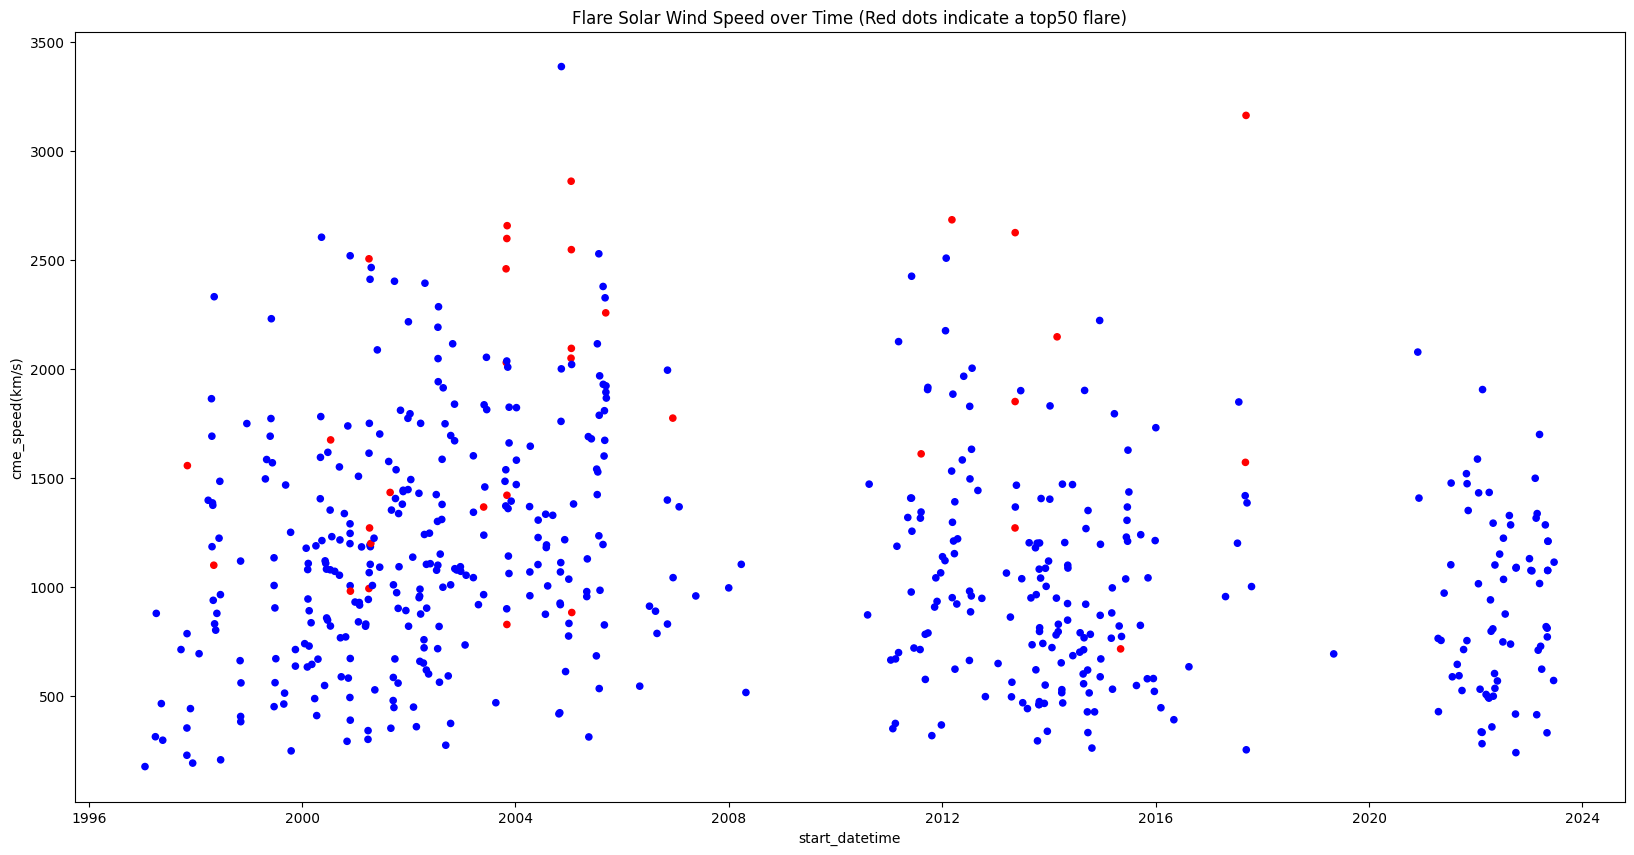

In [41]:
#cme speed over time
colors=np.where(data2['Ranked']==True,'red','blue')
data2['cme_speed']=pd.to_numeric(data2['cme_speed'],errors='coerce')
data2.plot.scatter(x='start_datetime', y='cme_speed',c=colors,figsize=(20,10),title='Flare Solar Wind Speed over Time (Red dots indicate a top50 flare)',ylabel='cme_speed(km/s)')


Top 50 flares do not appear to cluster around a values/thresholds of CME_speeds

<Axes: title={'center': 'Flare cme width over Time (Red dots indicate a top50 flare)'}, xlabel='start_datetime', ylabel='cme_width(deg)'>

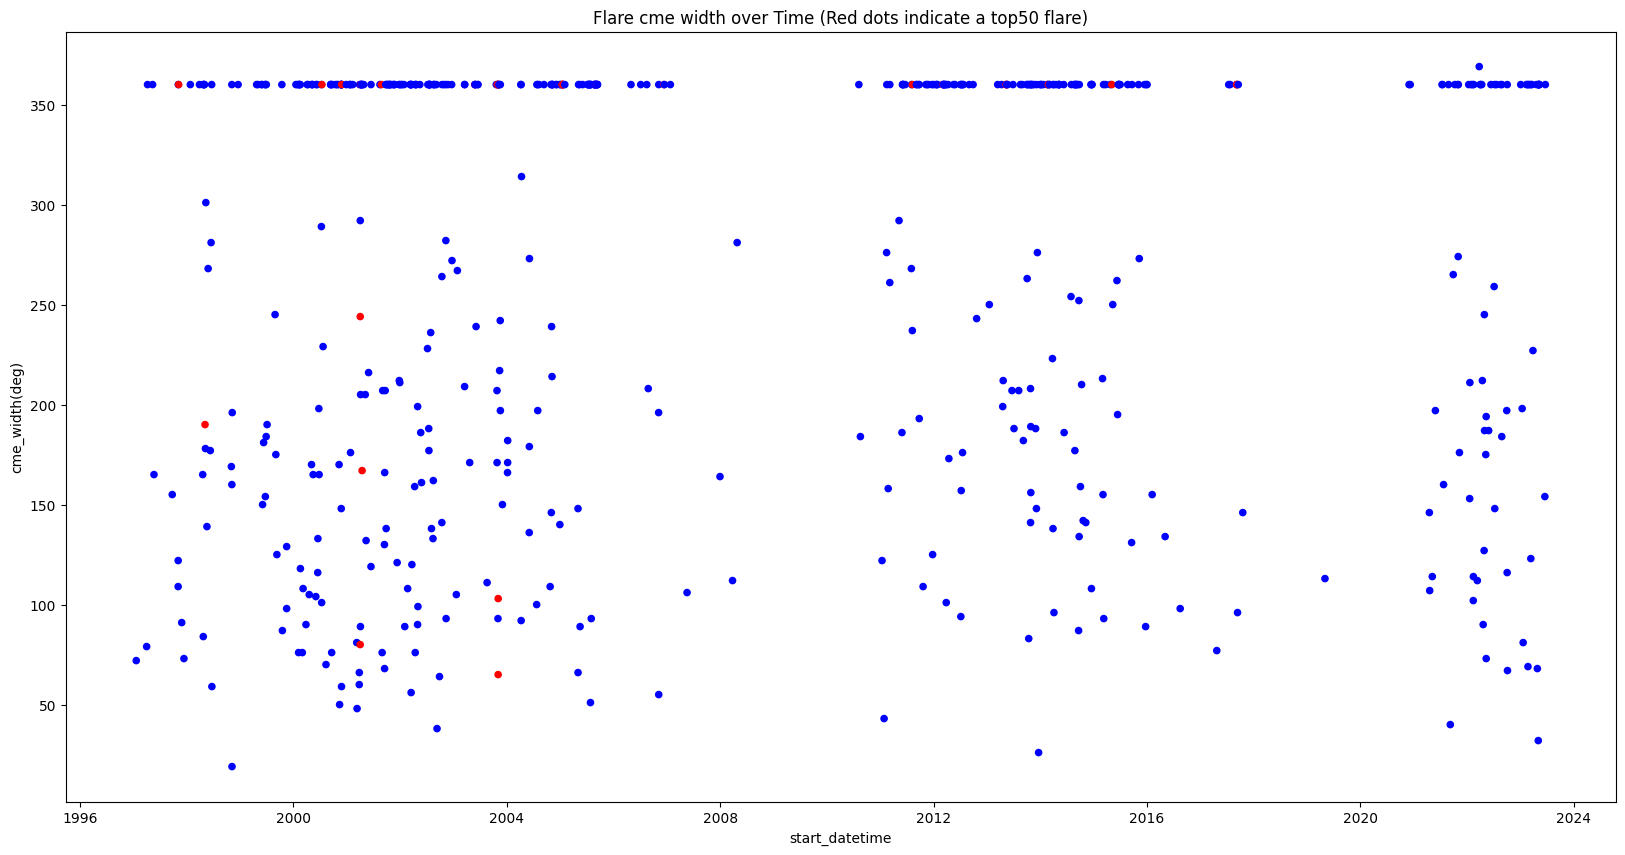

In [42]:
#cme width over time
colors=np.where(data2['Ranked']==True,'red','blue')
data2['cme_width']=pd.to_numeric(data2['cme_width'],errors='coerce')
data2.plot.scatter(x='start_datetime', y='cme_width',c=colors,figsize=(20,10),title='Flare cme width over Time (Red dots indicate a top50 flare)',ylabel='cme_width(deg)')


All but 6 of the top 50 flares with measured cme_widths have widths of 360 degrees.

<Axes: title={'center': 'Flare cme angle over Time (Red dots indicate a top50 flare)'}, xlabel='start_datetime', ylabel='cme_angle(deg)'>

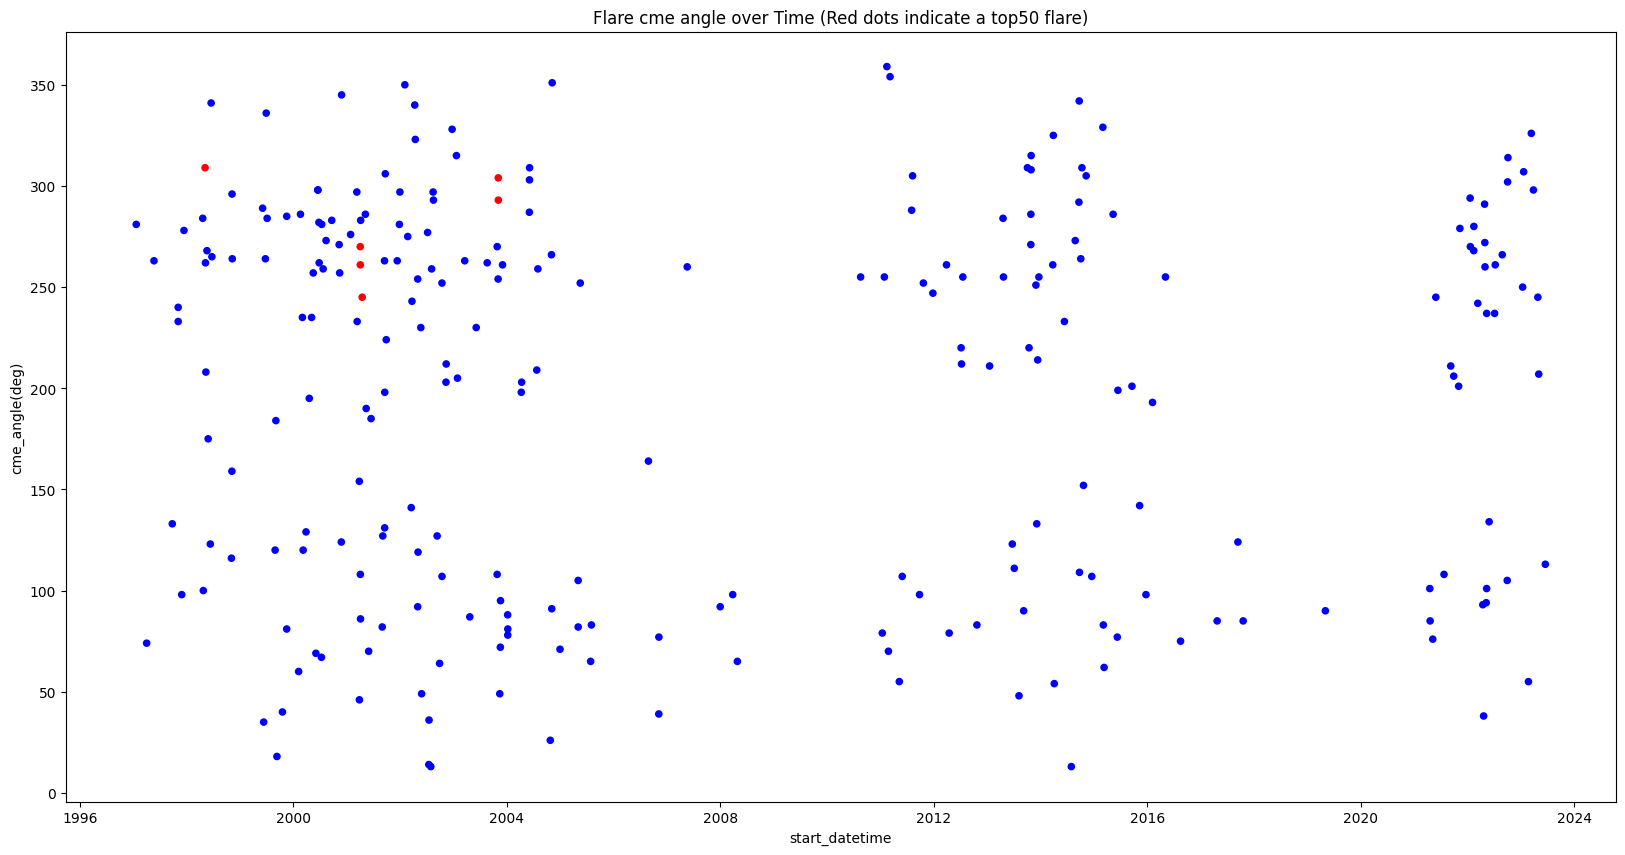

In [43]:
#angle over time
colors=np.where(data2['Ranked']==True,'red','blue')
data2['cme_angle']=pd.to_numeric(data2['cme_angle'],errors='coerce')
data2.plot.scatter(x='start_datetime', y='cme_angle',c=colors,figsize=(20,10),title='Flare cme angle over Time (Red dots indicate a top50 flare)',ylabel='cme_angle(deg)')


Non-Halo CMEs in the top 50 all have CME_angles ~250+ degrees

**Task 8: Halo CME ranked vs. unranked**

<Axes: title={'center': 'Count plot of CME Halos for Solar Flares colored by whether flares are ranked in top 50 or not'}, xlabel='Whether there is a CME Halo'>

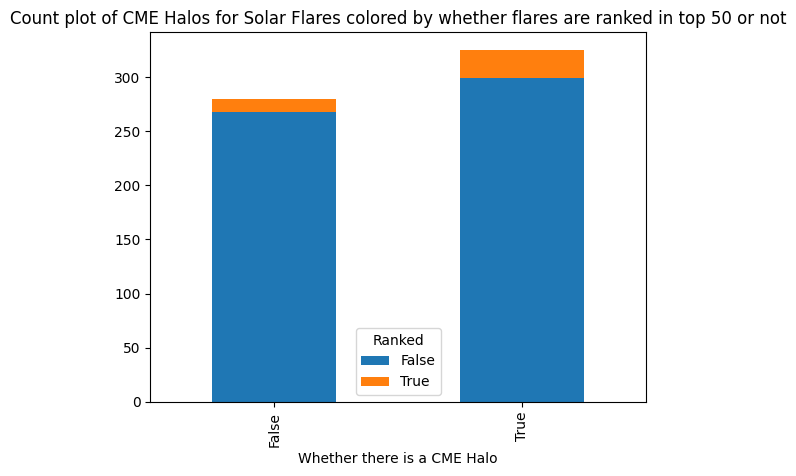

In [57]:
#creating stacked bar chart of whether there is a halo with counts of ranked vs. not-ranked
pd.crosstab(data2['is_halo'],data2['Ranked']).plot.bar(xlabel="Whether there is a CME Halo", title="Count plot of CME Halos for Solar Flares colored by whether flares are ranked in top 50 or not",  stacked=True)

As can be seen by the plot above, the results suggest that top 50 flares are more likely to have CME Halos than not. This can be inferred because while the flares in the dataset are almost balanced between Halo and no-Halo, visually it appears about 3x the ammount of ranked flares can be found in the Halo group compared to the no-Halo group.

**Task 9:Monthly Histogram**

In [58]:
#creating column that extracts the year and month from datetime object
data2['year_month_bin']=data2['start_datetime'].dt.strftime("%Y/%m")

plt.rcParams.update({'font.size':48})
pd.crosstab(data2['year_month_bin'],data2['Ranked']).plot.bar(title="Monthly Solar Flares colored by whether ranked top 50",xlabel='year/month',figsize=(150,50),stacked=True)

<Axes: title={'center': 'Monthly Solar Flares colored by whether ranked top 50'}, xlabel='year/month'>

It can be seen from the above chart that top50 flares tended to cluster in the same months, and it was not necessarily a relection of the total number of flares that month. They tended to follow somewhat of an interval pattern.